In [1]:
import tensorflow as tf
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt

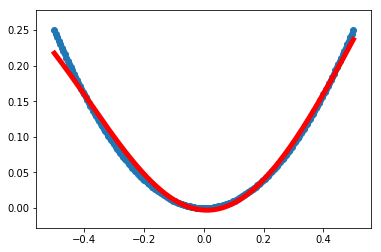

In [4]:
# 样本数据
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]             # 定义形状 200行 不确    返回指定区间内均匀分布的数字200个  np.newaxis是维度
#noise = 0.0
noise = np.random.normal(0,0.02,x_data.shape)                                      # 噪声 随机取 正态分布 形如x_data 从正态分布中返回几个
y_data = np.square(x_data) + noise

# 构造模型
x = tf.placeholder(tf.float32,[None,1])                                                                         # 定义形状 行不确定 一列
y = tf.placeholder(tf.float32,[None,1])

# 构建神经网络 考虑到 输入输出都是一个个的点 所以输入输出层都是一个神经元 中间层自定义 这里是10个神经元
# 定义中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))                                                               # 返回一个形如shape张量
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
# 定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 准备拟合
loss = tf.reduce_mean(tf.square(y_data-prediction))                                             # 二次代价函数 = 样本值 - 预测值 的平方 求平均
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) 
# optimizer = tf.train.GradientDescentOptimizer(0.01)                                           # 设置一个优化器 用梯度下降法 学习率为0.2
# train = optimizer.minimize(loss)                                                                              # 用优化器 最小化代价函数 

# 初始化变量
init = tf.global_variables_initializer()

# 定义会话 启动默认图 跑起来
with tf.Session() as sess:
    sess.run(init)
    # 训练
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})

    # 预测
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data)  # 散点图
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()